In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

## Geometry, consumption  parameters

In [12]:
avo = 6.022e23   #avo's number
m2µm  = 1e6      #convert meters from/to micrometer

## Geometry (cylindrical):  Surface area, volume, cross-sectional area

def surf_a(d, l):               # Surface area
    return np.pi *  d  * l
def vol(d , l ):                # Volume
    return np.pi*l*(d/2)**2
def cross_a(d):
    return np.pi *  (d/2)**2

## Base consumption density, per volume and per surface-area

base_cyt = 10432667.412756/((3.1e-16 )*avo)   #moles ATP /sec per m^3 
base_mem = 909175.81/((5.68e-10 )*avo)      #moles ATP /sec per m^2

## Total base consumption 
def base_cons(volume, sarea , bc=base_cyt, bm = base_mem ):
    return bc*volume + bm * sarea

## Firing Rate , EFR
f_rate = np.arange(1,100,10)



## ATP Diffusion coefficient (highest end)
DATP = 300  ## µm^2/s


## Dimension ranges for axons(uniform, i.e. a particular d and l define the diameter and length along the whole axon)

d_range = np.arange(0.1,1.1,0.1)  # diameters in µm
l_range  = np.arange(1,11,0.1)  # length from mito midpoint to midpoint b/w  mito

X = np.copy(d_range)
Y = np.copy(l_range)
X, Y = np.meshgrid(d_range, l_range)




In [13]:
#  What are our parameters? 
#  - Length and Width
#  - Firing Rate    ( 1 to 100)
#  - Steady State ADP in bouton 1  for steady state ADP < rest ADP

#  What are some pitfalls/caps?
#  - 2x ATP consumption ≤ max ATP production (literature  max prod cap)
# production caps (not pro-rated, straight from previous )

In [14]:
## Production caps

#V_mito = lambda d: 4*np.pi/3*(d/2)**3

In [15]:
#mito_vmM = np.array([V_mito(0.13/m2µm),V_mito(0.3/m2µm)])

#60.3*.195*1.06*mito_vmM/(vol(1/m2µm,np.array([float(l_range[0])/m2µm ,float(l_range[-1])/m2µm  ]  )  ) )

### ATP Drop
$$
\text{Total Areal Consumption for a compartment} = C^{SA} \times \text{Surface Area} 
$$

In [16]:
Z = base_cons(vol( X/m2µm , Y/m2µm )  ,  surf_a( X/m2µm , Y/m2µm ))
print (min(Z[0]), max(Z[0] ) ,min(Z[-1]), max(Z[-1]))

print(base_cons(vol( d_range[-1]/m2µm , l_range[-1]/m2µm )  ,  surf_a( d_range[-1]/m2µm , l_range[-1]/m2µm )) )

1.273960051396744e-21 5.224216660380724e-20 1.388616456022452e-20 5.694396159814994e-19
5.694396159814994e-19


In [17]:
np.shape(Y)

(100, 10)

In [18]:
def plot_surface(x,y,z,x_ti,y_ti,z_ti,ax_d = 13):
    ax = plt.figure().add_subplot(1, 1, 1, projection='3d')
    surf = ax.plot_surface(x,y,z, linewidth=0, antialiased=True)
    ax.set_xlabel(x_ti)
    ax.set_ylabel(y_ti)
    ax.set_zlabel(z_ti)
    ax.dist = ax_d
    plt.show()
    return None

# Good first - add contours of single lines for fixed diameters

## Base ATP consumption through varying Diameters and Lengths

C:\Users\semps\AppData\Local\Temp\ipykernel_876\4071131718.py:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = ax_d


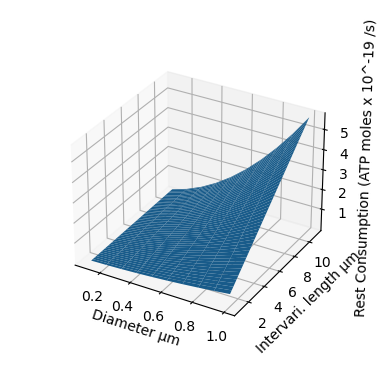

In [19]:
Z = base_cons(vol( X/m2µm , Y/m2µm )  ,  surf_a( X/m2µm , Y/m2µm ))
x_T, y_T, z_T  = 'Diameter µm' , 'Intervari. length µm' , 'Rest Consumption (ATP moles x 10^-19 /s)'
plot_surface(X,Y,Z,x_T, y_T, z_T)
plt.show()

C:\Users\semps\AppData\Local\Temp\ipykernel_876\4071131718.py:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = ax_d


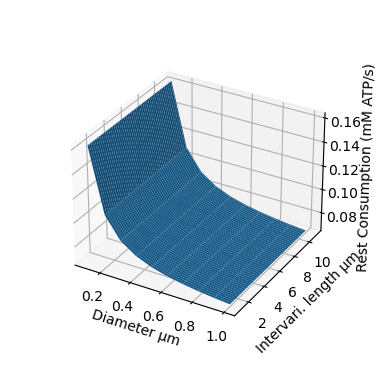

0.16220563158511744


In [20]:
Z = base_cons(vol( X/m2µm , Y/m2µm )  ,  surf_a( X/m2µm , Y/m2µm ))/vol( X/m2µm , Y/m2µm )
x_T, y_T, z_T  = 'Diameter µm' , 'Intervari. length µm' , 'Rest Consumption (mM ATP/s)'
plot_surface(X,Y,Z,x_T, y_T, z_T)

print(max(Z[-1]))
plt.show()


## Consumption estimates for activity:  https://www.jneurosci.org/content/42/6/954/tab-figures-data

Fig 3 (F) == Power ATP molecules per sec Ca2+
Fig 4 (F) == Power ATP molecules per sec Na+

comitted_ca and committed_na are ATP molecules per Action Potential
Power demand taken from supple tables, ATP molecules per sec


$$
\begin{align}
MN    &&  \text{ATP molecules/s for Ca2+} &&  \text{for Na+} && \text{Surface Area } µm^2 \\
M6Ib  &&  6.82E7  && 6.49E7 && 5.68E-10 \\
M6Is  &&  0.33E7 && 0.3E7 && 2.34E-10 \\
M13Ib  &&  9.97E7 && 12.1E7 && 5.43E-10 \\
M13Is  &&  0.31E7 && 0.32E7 && 2.51E-10 \\
M12Ib  &&  8.46E7 && 7.93E7 && 5.95E-10 \\
M12Is  &&  0.49E7 && 0.37E7 && 2.95E-10 \\
\end{align}
$$



In [21]:
##  'power_XX' refers to the ATP consumption density.  'SA' is molecules of ATP consumed per second.  
## 'vol' is due to vesicle processes  

terms = {
    "M61b" : {'power_sa': (6.82e7+6.49e7)/avo ,'power_vol': 2.27e7 /avo ,'area':5.68e-10 , 'volume':3.1e-16 },\
    'M61s':  {'power_sa': (0.33e7+0.3e7)/avo  ,'power_vol': 0.29e7 /avo  ,'area':2.34e-10 , 'volume':9.01e-17 }, \
    'M131b': {'power_sa': (9.97e7+12.1e7)/avo ,'power_vol': 2.4e7  /avo ,'area':5.43e-10 , 'volume':3.92e-16 } 
            } 

In [22]:
cSA=np.mean([terms['M61b']['power_sa']/terms['M61b']['area']/18,\
 terms['M61s']['power_sa']/terms['M61s']['area']/2,\
 terms['M131b']['power_sa']/terms['M131b']['area']/34])/2

print(cSA)
# #np.mean
# ([terms['M61b']['power_vol']/terms['M61b']['volume']/1,\
#  terms['M61s']['power_vol']/terms['M61s']['volume']/1,\
#  terms['M131b']['power_vol']/terms['M131b']['volume']/1])

1.0637166789598187e-08


C:\Users\semps\AppData\Local\Temp\ipykernel_876\1613391490.py:22: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2.dist = 13


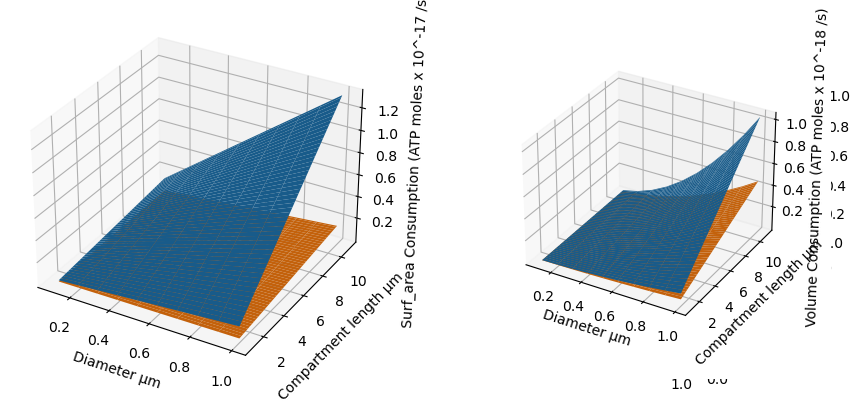

In [23]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax1 = fig.add_subplot(1,2,1, projection ='3d')
ax2= fig.add_subplot(1,2,2,projection='3d')


ZA = terms['M61b']['power_sa']*surf_a(X/m2µm,Y/m2µm)/terms['M61b']['area']/1
surf = ax1.plot_surface(X, Y, ZA, linewidth=0, antialiased=True)
ZA2 = terms['M61s']['power_sa']*surf_a(X/m2µm,Y/m2µm)/terms['M61s']['area']
surf = ax1.plot_surface(X, Y, ZA2, linewidth=0, antialiased=True)
ax1.set_xlabel('Diameter µm')
ax1.set_ylabel('Compartment length µm')
ax1.set_zlabel('Surf_area Consumption (ATP moles x 10^-17 /s)')

ax2= fig.add_subplot(1,2,2,projection='3d')
ZV = terms['M61b']['power_vol']*vol(X/m2µm,Y/m2µm)/terms['M61b']['volume']/1
surf = ax2.plot_surface(X, Y, ZV, linewidth=0, antialiased=True)
Z2V = terms['M61s']['power_vol']*vol(X/m2µm,Y/m2µm)/terms['M61s']['volume']
surf = ax2.plot_surface(X, Y, Z2V, linewidth=0, antialiased=True)
ax2.set_xlabel('Diameter µm')
ax2.set_ylabel('Compartment length µm')
ax2.set_zlabel('Volume Consumption (ATP moles x 10^-18 /s)')
ax2.dist = 13
plt.show()

In [24]:
## Note that consumption C is for ONE compartment, so once you have your consumptions over the whole ofthe axon, cut it appropriately

In [25]:
#  Quantifying largest consumptions in terms  of mM/s, presuming 
#the  largest consumptions come from the thinnest and longest axons

# print('Largest (areal consumption, volumic consumption: ', '\n',(max(ZA[-1])/vol( min(d_range)/m2µm , max(l_range)/m2µm   ), \
# max(ZV[-1])/vol(     min(d_range)/m2µm  ,  max(l_range)/m2µm   ) ),  str('mM/s'))

### ATP Drops for 100 Hz firing M6Ib, compartment 2 has calcium active through the whole axon (over-rep'd consumption)

C:\Users\semps\AppData\Local\Temp\ipykernel_876\674156110.py:15: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 13


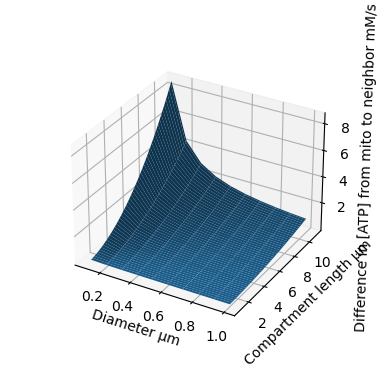

C:\Users\semps\AppData\Local\Temp\ipykernel_876\674156110.py:24: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2.dist = 13


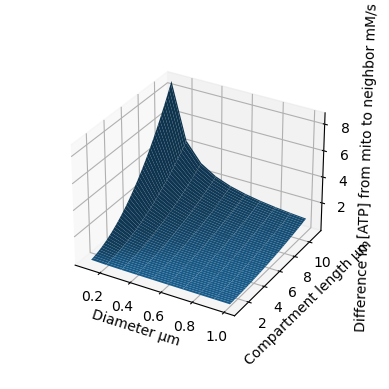

C:\Users\semps\AppData\Local\Temp\ipykernel_876\674156110.py:33: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax3.dist = 13


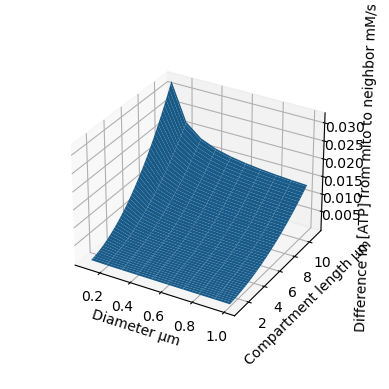

In [26]:

## Applying a EFR of 100 on the M6Ib-type ATP cost
ATP_drop = (ZA+ZV)*(Y/2/m2µm)/(2*np.pi*(DATP/(m2µm)**2 )*(X/m2µm)**2/4)

#plot_surface(X,Y,)


#Just firing
ax1 = plt.figure().add_subplot(1, 1, 1, projection='3d')
ATP_drop = (ZA+ZV)*(Y/2/m2µm)/(2*np.pi*(DATP/(m2µm)**2 )*(X/m2µm)**2/4)
ATP_drop_base = (base_cons(vol(X/m2µm,Y/m2µm), surf_a(X/m2µm,Y/m2µm)))*(Y/m2µm)/(2*np.pi*(DATP/(m2µm)**2 )*(X/m2µm)**2/4)
surf1 = ax1.plot_surface(X, Y,ATP_drop*100/18, linewidth=0, antialiased=True)
ax1.set_xlabel('Diameter µm')
ax1.set_ylabel('Compartment length µm')
ax1.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
ax1.dist = 13
plt.show()

#Firing consumption + Base consumption
ax2 = plt.figure().add_subplot(1, 1, 1, projection='3d')
surf2 = ax2.plot_surface(X, Y,ATP_drop*100/18+ATP_drop_base, linewidth=0, antialiased=True)
ax2.set_xlabel('Diameter µm')
ax2.set_ylabel('Compartment length µm')
ax2.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
ax2.dist = 13
plt.show()

#Base consumption
ax3 = plt.figure().add_subplot(1, 1, 1, projection='3d')
surf3 = ax3.plot_surface(X, Y,ATP_drop_base, linewidth=0, antialiased=True)
ax3.set_xlabel('Diameter µm')
ax3.set_ylabel('Compartment length µm')
ax3.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
ax3.dist = 13
plt.show()

In [27]:
# (100/18)*ATP_drop[-1] , ATP_drop_base[-1]

In [28]:
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6):
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)

In [29]:
beta(.1)

25.556510679356162

In [30]:
# ax = plt.figure().add_subplot(1, 1, 1, projection='3d')

# Ph_ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP+beta(0.02)*450)/(m2µm)**2 )*(X/m2µm)**2/4)
# ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP)/(m2µm)**2 )*(X/m2µm)**2/4)

# surf1 = ax.plot_surface(X, Y,Ph_ATP_drop*100/18, linewidth=0, antialiased=True)
# surf2 = ax.plot_surface(X, Y,ATP_drop*100/18, linewidth=0, antialiased=True, alpha =0.4)

# ax.set_xlabel('Diameter µm')
# ax.set_ylabel('Compartment length µm')
# ax.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax.dist = 13
# plt.show()

In [31]:
# ## Trying different ADP_1 values

# ax = plt.figure().add_subplot(1, 1, 1, projection='3d')

# ADP02_ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP+beta(0.02)*450)/(m2µm)**2 )*(X/m2µm)**2/4)
# ADP08_ATP_drop = (ZA+ZV)*(Y/m2µm)/(2*np.pi*((DATP+beta(0.08)*450)/(m2µm)**2 )*(X/m2µm)**2/4)

# surf1 = ax.plot_surface(X, Y,ADP02_ATP_drop*100/18, linewidth=0, antialiased=True)
# surf2 = ax.plot_surface(X, Y,ADP08_ATP_drop*100/18, linewidth=0, antialiased=True, alpha =0.4)

# ax.set_xlabel('Diameter µm')
# ax.set_ylabel('Compartment length µm')
# ax.set_zlabel('Difference in [ATP] from mito to neighbor mM/s')
# ax.dist = 13
# plt.show()

## What treatments go together?

### Ca2+ and Na+ go with surface area
### base rates are already subdivided
### "signaling" a la KJ 2022 is volumic (though shepard would probably object for en passant varicosities. Try this version later.
### Scale by EFR, so average consumption just gets multiplied by the EFR
### ATP production must match the consumption

An analytical solution for ATPdrop without phos is as follows:
$$ \Delta [ATP] = \frac{L^2}{D_{ATP} d} \left( C^{SA}_{Na+} * \lambda + C^{SA}_{Ca2+} *\frac{L_{AZ}}{L}  \right)*\text{firing rate} $$

where $L,d,C^V,C^{SA} $ period compartments 1+2 lengths, axon diameter, surface areal ATP consumption density for Na+ or Ca2+, and $L_{AZ} $ is the length of an active zone.

## Update for modeling - partitioning active zones into compartment 2 so as to not overcount calcium.

In [32]:
def dropNP(l, lz ,𝜆 ,d, csn, csca, fr, D): # Phosphagen-less ATP drop
    return (l**2 /(D * d)  )*( csn* 𝜆 +  csca*(lz/l) )*fr 
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6): # Used to scale D_ATP, multiply dropNP result by D_ATP and divide it by beta()
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)


In [33]:
## Prepping figure ranges:

# Diameter, Length vs. ATP drop - Illustrate the domain of geometries we're working with
## Set  firing rate to 33,66,100.  Thin,  long, active axons get the worst of it


#  ADP, firing rate vs. ATP drop, 3 different lengths
ADP_range = np.arange(0.02,2.1,0.01)
fr_range = np.array([1,10,33,50,80,100])




#Figure, illustrating stability in [ATP]1,[ADP]1, vs. KPh?
## 

In [34]:
dropNP(10, 2 ,  0.8 , 0.2/m2µm , cSA, cSA, 33, 300 )

0.5850441734279003

In [35]:
dropNP(11, 2 , 0.8 , 0.2/m2µm , cSA, cSA, 100, 300 )

2.1061590243404407

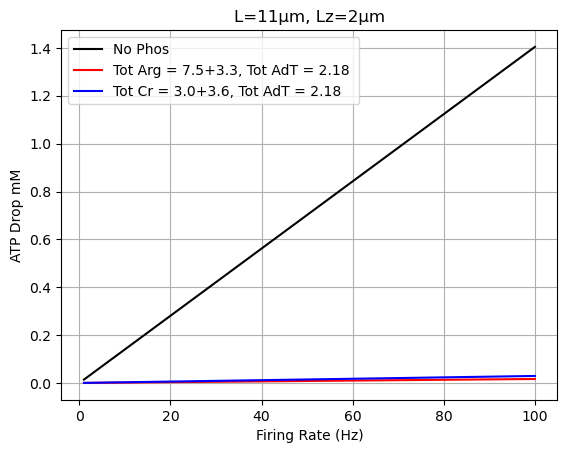

0.02084124476390214 0.01180967180638077


In [36]:


Drop_NPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )
Drop_APrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 300*beta(0.03) )
Drop_CPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 300*beta(0.03,6.6,2.18,166) )

plt.plot(fr_range,Drop_NPrange,color='black', label='No Phos')
plt.plot(fr_range,Drop_APrange,color='red', label ='Tot Arg = 7.5+3.3, Tot AdT = 2.18 ')
plt.plot(fr_range,Drop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6, Tot AdT = 2.18 ' )
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ATP Drop mM')
plt.title('L=11µm, Lz=2µm')
plt.legend()
plt.grid()
plt.show()

print(Drop_CPrange[-1]/Drop_NPrange[-1] , Drop_APrange[-1]/Drop_NPrange[-1]  )

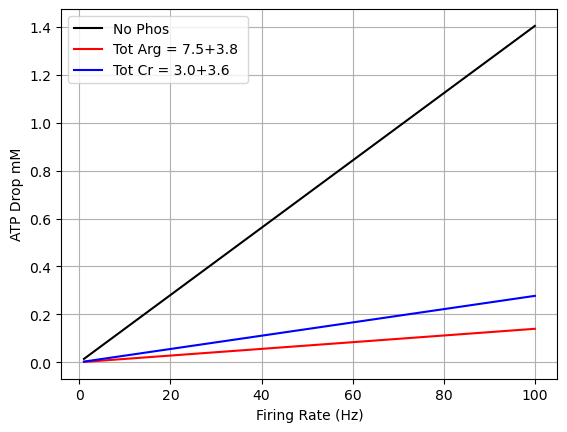

In [37]:
Drop_NPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )
Drop_APrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.3, AdT=3.0) )
Drop_CPrange = dropNP(11, 2 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.3,15,3.0,166) )
plt.plot(fr_range,Drop_NPrange,color='black', label='No Phos')
plt.plot(fr_range,Drop_APrange,color='red', label ='Tot Arg = 7.5+3.8 ')
plt.plot(fr_range,Drop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6 ' )
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ATP Drop mM')

plt.legend()
plt.grid()
plt.show()


In [38]:
Drop_NPrange[-1],Drop_APrange[-1], Drop_CPrange[-1]

(1.4041060162269607, 0.1396634310041553, 0.27720062367091486)

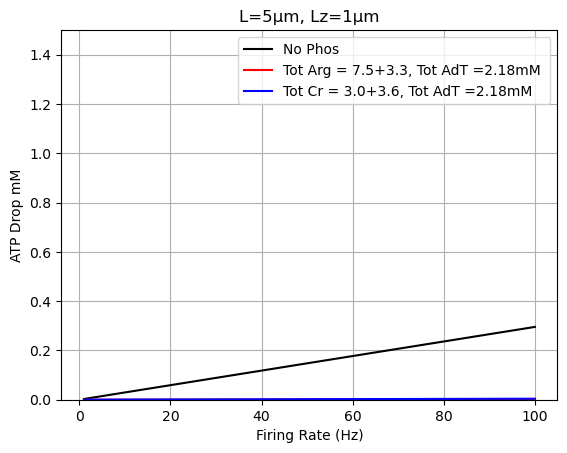

In [39]:
Drop_NPrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )
Drop_APrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.03, AdT=2.18) )
Drop_CPrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, fr_range, 300 )*300/(300 + 450*beta(0.03,6.6,2.18,166) )
plt.plot(fr_range,Drop_NPrange,color='black', label='No Phos')
plt.plot(fr_range,Drop_APrange,color='red', label ='Tot Arg = 7.5+3.3, Tot AdT =2.18mM ')
plt.plot(fr_range,Drop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6, Tot AdT =2.18mM ' )
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ATP Drop mM')
plt.ylim(0,1.5)
plt.legend()
plt.title('L=5µm, Lz=1µm')
plt.grid()
plt.show()

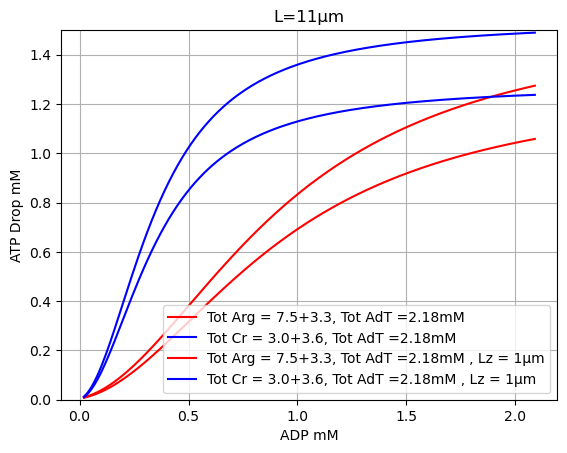

In [40]:
ADP_range = np.arange(0.02,2.1,0.01)
#ADPDrop_NPrange = dropNP(5, 1 , 0.8 , 0.3/m2µm , cSA, cSA, 100, 300 )
ADPDrop_APrange = dropNP(11, 3 , 0.8 , 0.3/m2µm , cSA, cSA, 100, 300 )*300/(300 + 450*beta(ADP_range, AdT=2.18) )
ADPDrop_CPrange = dropNP(11, 3 , 0.8 , 0.3/m2µm , cSA, cSA, 100, 300 )*300/(300 + 450*beta(ADP_range,6.6,2.18,166) )
ADPDrop_APrange1 = dropNP(11, 1 , 0.8 , 0.3/m2µm , cSA, cSA, 100, 300 )*300/(300 + 450*beta(ADP_range, AdT=2.18) )
ADPDrop_CPrange1 = dropNP(11, 1 , 0.8 , 0.3/m2µm , cSA, cSA, 100, 300 )*300/(300 + 450*beta(ADP_range,6.6,2.18,166) )

#plt.plot(ADP_range,ADPDrop_NPrange,color='black', label='No Phos')
plt.plot(ADP_range,ADPDrop_APrange,color='red', label ='Tot Arg = 7.5+3.3, Tot AdT =2.18mM ')
plt.plot(ADP_range,ADPDrop_CPrange,color='blue', label ='Tot Cr = 3.0+3.6, Tot AdT =2.18mM ' )
plt.plot(ADP_range,ADPDrop_APrange1,color='red', label ='Tot Arg = 7.5+3.3, Tot AdT =2.18mM , Lz = 1µm')
plt.plot(ADP_range,ADPDrop_CPrange1,color='blue', label ='Tot Cr = 3.0+3.6, Tot AdT =2.18mM , Lz = 1µm' )

plt.xlabel('ADP mM')
plt.ylabel('ATP Drop mM')
plt.ylim(0,1.5)
plt.legend()
plt.title('L=11µm')
plt.grid()
plt.show()

C:\Users\semps\AppData\Local\Temp\ipykernel_876\4071131718.py:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = ax_d


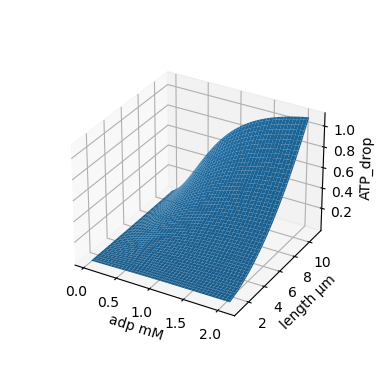

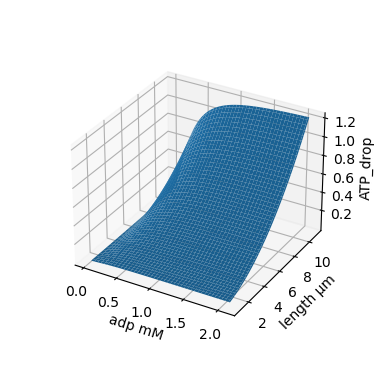

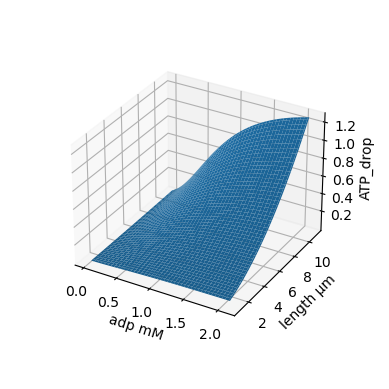

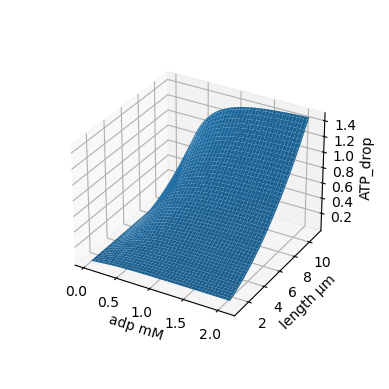

In [41]:
A,L = np.meshgrid( ADP_range, l_range)
AL_surfAP = dropNP(L, 1, 0.8, 0.3/m2µm, cSA,cSA,100,300)*300/(300 + 300*beta(A, AdT=2.18) )
AL_surfCP = dropNP(L, 1, 0.8, 0.3/m2µm, cSA,cSA,100,300)*300/(300 + 300*beta(A, 6.6 ,2.18,166) )

plot_surface(A,L,AL_surfAP, 'adp mM', 'length µm', 'ATP_drop')
plot_surface(A,L,AL_surfCP, 'adp mM', 'length µm', 'ATP_drop')

AL_surfAP = dropNP(L, 3, 0.8, 0.3/m2µm, cSA,cSA,100,300)*300/(300 + 300*beta(A, AdT=3.02) )
AL_surfCP = dropNP(L, 3, 0.8, 0.3/m2µm, cSA,cSA,100,300)*300/(300 + 300*beta(A, 6.6 ,3.02,166) )

plot_surface(A,L,AL_surfAP, 'adp mM', 'length µm', 'ATP_drop')
plot_surface(A,L,AL_surfCP, 'adp mM', 'length µm', 'ATP_drop')

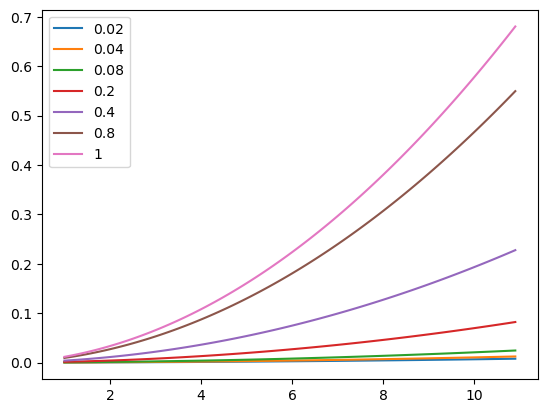

In [42]:
ADP_range = [0.02,0.04,0.08,0.2,0.4,0.8,1]
for A in ADP_range:
    pl = dropNP(l_range, 1, 0.8, 0.3/m2µm, cSA,cSA,100,300)*300/(300 + 450*beta(A, AdT=2.18) )
    plt.plot(l_range,pl, label=str(A))
plt.legend()
plt.show()

In [43]:
(10*3.14159*0.3)*(2*cSA)*1e-12/(3.14159*(10/m2µm)*(0.3/m2µm/2)**2 )

0.2836577810559517

[ 1 11 21 31 41 51 61 71 81 91]


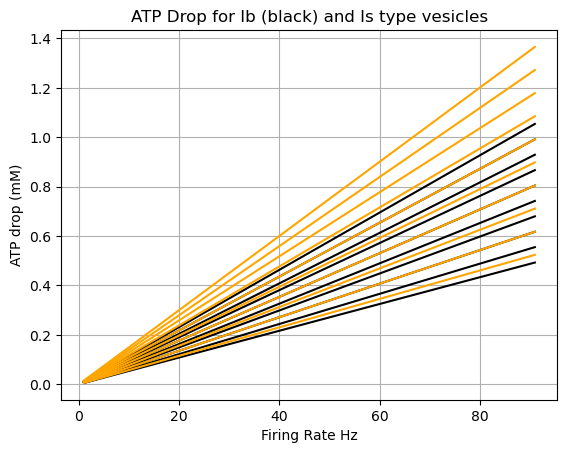

In [44]:
Nv_range = np.arange(1,11,1)
print(f_rate)
for j in [1,1.5]:
    for i in Nv_range:
        atp_drop = (0.003426*i*j*0.2 + 0.00473)*f_rate
        if j ==1: 
            plt.plot(f_rate,atp_drop, color='black')
        else:
            plt.plot(f_rate,atp_drop, color='orange' )
        
        plt.xlabel('Firing Rate Hz')
        plt.ylabel('ATP drop (mM)')
    
plt.title('ATP Drop for Ib (black) and Is type vesicles')
plt.grid()
plt.show()

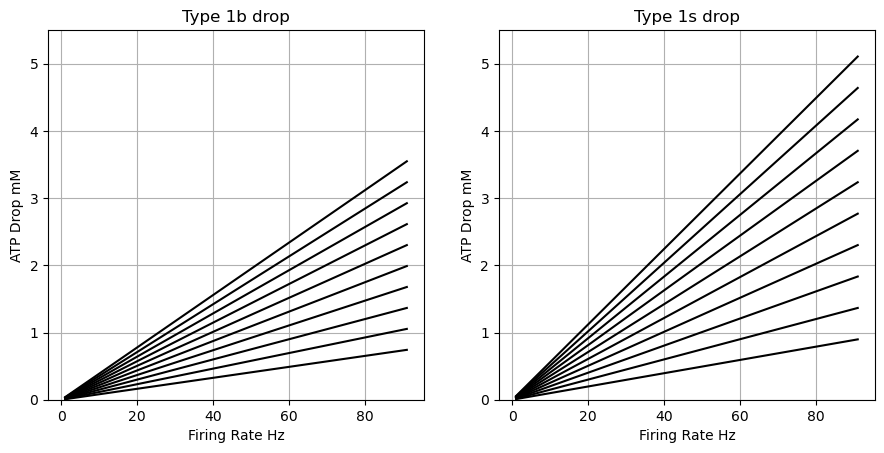

In [45]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for (k,j) in zip([1,1.5],[ax1,ax2]):
    for i in Nv_range:
        atp_drop = (0.003426*i*k + 0.00473)*f_rate
        j.plot(f_rate,atp_drop, color='black')
        j.set_ylim(0,5.5)
        j.set_ylabel('ATP Drop mM')
        j.set_xlabel('Firing Rate Hz')
ax1.grid()
ax1.set_title('Type 1b drop')
ax2.grid()
ax2.set_title('Type 1s drop')
plt.show()

In [46]:
def drop_mv(l, lz, d, D, nv,fr,ib=True,cmem=1.0637e-8, cves=2.906e-20 ):
    if ib==False:
        cves=1.5*cves
    else:
        cves=cves
    memdrop = 2*l*lz*cmem/(D*d)
    vesdrop = l*cves/(D*np.pi*d**2)
    return (memdrop + vesdrop*nv)*fr


# def dropNP(l, lz ,𝜆 ,d, csn, csca, fr, D): # Phosphagen-less ATP drop
#     return (l**2 /(D * d)  )*( csn* 𝜆 +  csca*(lz/l) )*fr 
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6): # Used to scale D_ATP, multiply dropNP result by D_ATP and divide it by beta()
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)

drop_mv(10/m2µm,2/m2µm,0.3/m2µm,300/m2µm/m2µm,nv_range,100,False)

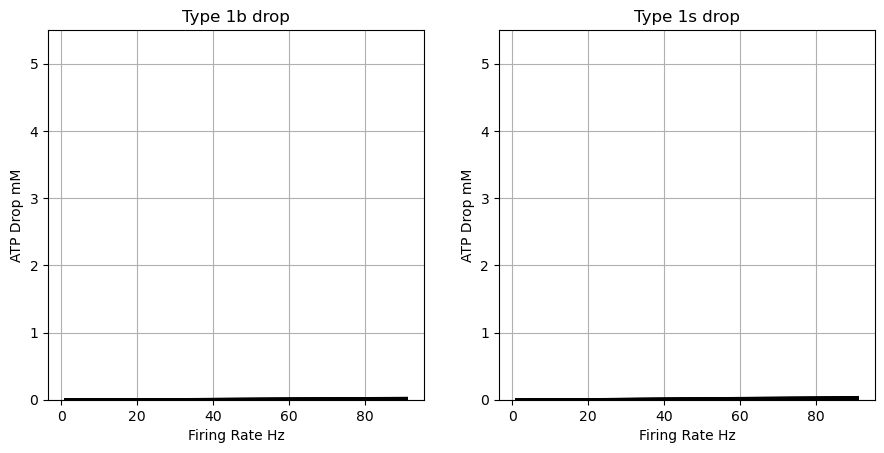

In [47]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


drop_mv(10/m2µm,2/m2µm,0.3/m2µm,300/m2µm/m2µm,Nv_range,100)*\
300/(300 + 450*beta(0.03))

for (k,j) in zip([True,False],[ax1,ax2]):
    for i in Nv_range:
        atp_drop = drop_mv(10/m2µm,2/m2µm,0.3/m2µm,300/m2µm/m2µm,i,f_rate,k)*300/(300 + 450*beta(0.03))
        j.plot(f_rate,atp_drop, color='black')
        j.set_ylim(0,5.5)
        j.set_ylabel('ATP Drop mM')
        j.set_xlabel('Firing Rate Hz')
ax1.grid()
ax1.set_title('Type 1b drop')
ax2.grid()
ax2.set_title('Type 1s drop')
plt.show()

In [48]:
d_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

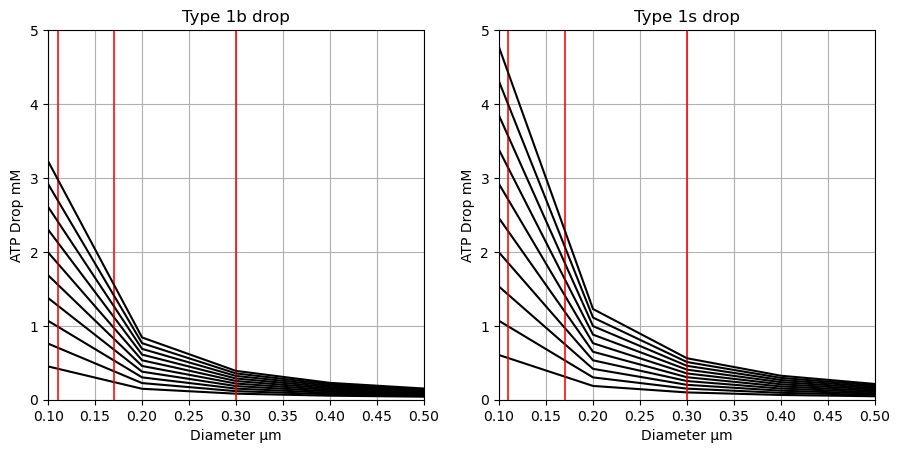

In [49]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


drop_mv(10/m2µm,2/m2µm,0.3/m2µm,300/m2µm/m2µm,Nv_range,100)*\
300/(300 + 450*beta(0.03))


for (k,j) in zip([True,False],[ax1,ax2]):
    for i in Nv_range:
        atp_drop = drop_mv(10/m2µm,2/m2µm,d_range/m2µm,300/m2µm/m2µm,i,10,k)#*300/(300 + 450*beta(0.03))
        j.plot(d_range,atp_drop, color='black')
        j.set_ylim(0,5)
        j.set_xlim(0.10,0.5)
        j.set_ylabel('ATP Drop mM')
        j.set_xlabel('Diameter µm')
        j.vlines(0.11,0,5, linewidth=0.2 ,color= 'red')
        j.vlines(0.17,0,5,linewidth=0.2 ,color='red')
        j.vlines(0.3,0,5,linewidth=0.2 ,color= 'red')
ax1.grid()
ax1.set_title('Type 1b drop')
ax2.grid()
ax2.set_title('Type 1s drop')
plt.show()

In [50]:
d_range = np.arange(0.10,3,0.01)  # diameters in µm


In [51]:
def drop_mvdz(l, lz, d, dz, D, nv,fr,ib=True,cmem=1.0637e-8, cves=2.906e-20 ):
    if ib==False:
        cves=1.5*cves
    else:
        cves=cves
    memdrop = 2*l*lz*dz*cmem/(D*d**2)
    vesdrop = l*cves/(D*np.pi*d**2)
    return (memdrop + vesdrop*nv)*fr


# def dropNP(l, lz ,𝜆 ,d, csn, csca, fr, D): # Phosphagen-less ATP drop
#     return (l**2 /(D * d)  )*( csn* 𝜆 +  csca*(lz/l) )*fr 
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6): # Used to scale D_ATP, multiply dropNP result by D_ATP and divide it by beta()
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)

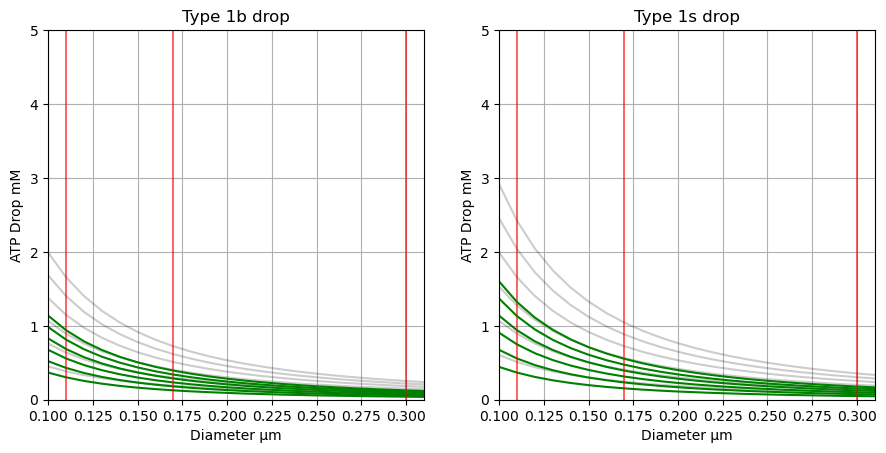

In [52]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for (k,j) in zip([True,False],[ax1,ax2]):
    for i in Nv_range[:6]:
        atp_drop =   drop_mv(10/m2µm,2/m2µm,d_range/m2µm,300/m2µm/m2µm,i,10,k)#*300/(300 + 450*beta(0.03))
        atp_dropdz = drop_mvdz(10/m2µm,2/m2µm,d_range/m2µm, 0.3/m2µm,300/(m2µm**2),i,5,k)#*300/(300 + 450*beta(0.03))
        j.plot(d_range,atp_drop, color='black',alpha=0.2)
        j.plot(d_range,atp_dropdz, color='green')
        j.set_ylim(0,5)
        j.set_xlim(0.10,0.31)
        j.set_ylabel('ATP Drop mM')
        j.set_xlabel('Diameter µm')
        j.vlines(0.11,0,5, linewidth=0.2 ,color= 'red')
        j.vlines(0.17,0,5,linewidth=0.2 ,color='red')
        j.vlines(0.3,0,5,linewidth=0.2 ,color= 'red')
ax1.grid()
ax1.set_title('Type 1b drop')
ax2.grid()
ax2.set_title('Type 1s drop')
plt.show()

## Trying found physiological values

In [86]:
Rat_Hip = {"ax_di": 0.081,"var_da":0.649,"var_len":0.648,"fire_rate":15, \
           "ax_len":5,"rel_prob":0.4,"num_az":1,"qc":1,"atp": 2.77*1.04,\
           "cr":4.5*1.04,"pcr":5.5*1.04, "kph":166, "Datp":300,"Dpcr":328}


In [87]:
globals().update(Rat_Hip)
adp = atp*cr/kph/pcr
at  = adp+atp
crt = pcr+cr

In [88]:
d_range[:91]

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  ])

In [89]:
def drop_ATPnophos(axlen, varlen, axd, vard, Diffatp, numves, rel_prob ,firate,ib=True,cmem=1.0637e-8, cves=2.906e-20 ):
    if ib==False:
        cves=1.5*cves
    else:
        cves=cves
    memdrop = 2*axlen*varlen*vard*cmem/(Diffatp*axd**2)
    vesdrop = axlen*cves*numves*rel_prob/(Diffatp*np.pi*axd**2)
    return (memdrop + vesdrop*numves)*firate


# def dropNP(l, lz ,𝜆 ,d, csn, csca, fr, D): # Phosphagen-less ATP drop
#     return (l**2 /(D * d)  )*( csn* 𝜆 +  csca*(lz/l) )*fr 
def beta(ADP_1,PhT=7.5+3.3,AdT=2.18,KPh=39.6): # Used to scale D_ATP, multiply dropNP result by D_ATP and divide it by beta()
    return KPh*AdT*PhT/((AdT + (KPh - 1)*ADP_1)**2)

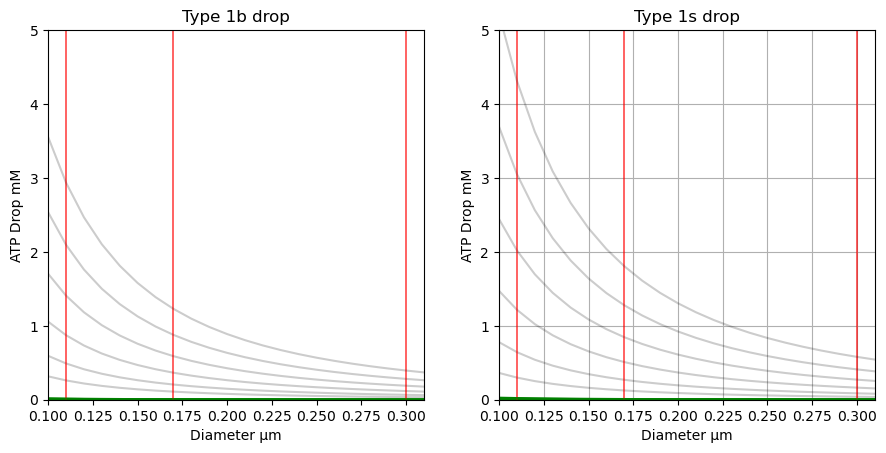

In [96]:
fig = plt.figure(figsize=plt.figaspect(0.45))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for (k,j) in zip([True,False],[ax1,ax2]):
    for i in Nv_range[:6]:
        atp_drop =   drop_ATPnophos(ax_len/m2µm,1*var_len/m2µm,d_range[:91]/m2µm,var_da/m2µm,\
                                    Datp/m2µm/m2µm,i,rel_prob,15,k)#*300/(300 + 450*beta(0.03))
        atp_dropdz = drop_ATPnophos(ax_len/m2µm,1*var_len/m2µm,d_range[:91]/m2µm,var_da/m2µm,\
                                    Datp/m2µm/m2µm,i,rel_prob,15,k)*Datp/(Datp + Dpcr*beta(adp*1.05,crt,at,kph))
        j.plot(d_range[:91],atp_drop, color='black',alpha=0.2)
        j.plot(d_range[:91],atp_dropdz, color='green')
        j.set_ylim(0,5)
        j.set_xlim(0.10,0.31)
        j.set_ylabel('ATP Drop mM')
        j.set_xlabel('Diameter µm')
        j.vlines(0.11,0,5, linewidth=0.2 ,color= 'red')
        j.vlines(0.17,0,5,linewidth=0.2 ,color='red')
        j.vlines(0.3,0,5,linewidth=0.2 ,color= 'red')
#ax1.grid()
ax1.set_title('Type 1b drop')
ax2.grid()
ax2.set_title('Type 1s drop')
plt.show()

In [85]:
print(atp_drop)

[8.96500118 7.40909189 6.22569527 5.30473443 4.5739802  3.98444497
 3.50195359 3.10207653 2.76697567 2.48337983 2.2412503  2.03288009
 1.85227297 1.69470722 1.55642382 1.43440019 1.32618361 1.22976697
 1.14349505 1.06599301 0.99611124 0.93288254 0.8754884  0.82323243
 0.77551913 0.73183683 0.69174392 0.65485765 0.62084496 0.58941494
 0.56031257 0.53331357 0.50822002 0.48485674 0.46306824 0.44271611
 0.4236768  0.4058398  0.38910595 0.37338614 0.35860005 0.34467517
 0.3315459  0.31915277 0.30744174 0.29636368 0.28587376 0.27593109
 0.26649825 0.25754097 0.24902781 0.24092989 0.23322063 0.22587557
 0.2188721  0.21218938 0.20580811 0.19971043 0.19387978 0.1883008
 0.18295921 0.17784172 0.17293598 0.16823046 0.16371441 0.1593778
 0.15521124 0.15120596 0.14735373 0.14364687 0.14007814 0.13664077
 0.13332839 0.13013501 0.12705501 0.12408306 0.12121419 0.11844367
 0.11576706 0.11318017 0.11067903 0.10825989 0.1059192  0.10365362
 0.10145995 0.09933519 0.09727649 0.09528113 0.09334653 0.091470

In [76]:
drop_ATPnophos(ax_len/m2µm,var_len/m2µm,d_range[:91]/m2µm,
                                    Datp/m2µm/m2µm,i,rel_prob,10,k)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [77]:
Nv_range


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])